In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import scipy
import emcee
import corner
import lalsimulation as ls
import h5py
import snr_calculation as s 
import populations as p

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def get_quantiles(fname, index, quantiles, hist=False, folder='mTOV_convergence', columns=None):
    root = '/mnt/c/users/christine/gwcosmology/spin_results/' + folder
    # print(root)
    array = np.genfromtxt(root+fname)
    
    if columns is not None:
        array[:,0] = array[:, columns[0]] - array[:, columns[1]]
        index = 0
    array = array[:,index]
    if hist:
        plt.hist(array,bins=50)
    return np.quantile(array, quantiles)

In [4]:
def get_constraints_1c(counts, mTOV, hist=False, detector="APlus", folder = 'mTOV_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_run_{}.txt'.format(detector, mTOV, counts[i])
        sigma_1 = get_quantiles(run_name, 2, [0.159, 0.841],hist=hist, folder=folder)
        sigma_2 = get_quantiles(run_name, 2, [0.025, 0.975], folder=folder)
        sigma_3 = get_quantiles(run_name, 2, [0.0015, 0.997], folder=folder)
        med = get_quantiles(run_name, 2, [0.5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_mTOV_1C_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

In [5]:
def get_constraints_lmg_2c(counts, mTOV, bhmin, hist=False, detector="APlus", folder = 'LMG_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_bhmin_{}_{}.txt'.format(detector, mTOV,bhmin,  counts[i])
        sigma_1 = get_quantiles(run_name, 2, [0.159, 0.841],hist=hist, folder=folder, columns=[5, 6])
        sigma_2 = get_quantiles(run_name, 2, [0.025, 0.975], folder=folder, columns=[5, 6])
        sigma_3 = get_quantiles(run_name, 2, [0.0015, 0.997], folder=folder, columns=[5, 6])
        med = get_quantiles(run_name, 2, [0.5], columns=[5, 6], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_LMG_2C_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

In [6]:
def get_constraints_slope_2c(counts, mTOV, hist=False, detector="APlus", folder = 'mTOV_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_run_{}_2c_slope.txt'.format(detector, mTOV, counts[i])
        sigma_1 = get_quantiles(run_name, 8, [0.159, 0.841],hist=hist, folder=folder)
        sigma_2 = get_quantiles(run_name, 8, [0.025, 0.975], folder=folder)
        sigma_3 = get_quantiles(run_name, 8, [0.0015, 0.997], folder=folder)
        med = get_quantiles(run_name, 8, [0.5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_mTOV_2C_slope_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

In [7]:
def get_bias_2c(counts, mTOV, hist=False, detector="APlus", folder = 'mTOV_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_run_{}_2c_bias.txt'.format(detector, mTOV, counts[i])
        sigma_1 = get_quantiles(run_name, 5, [0.159, 0.841],hist=hist, folder=folder)
        sigma_2 = get_quantiles(run_name, 5, [0.025, 0.975], folder=folder)
        sigma_3 = get_quantiles(run_name, 5, [0.0015, 0.997], folder=folder)
        med = get_quantiles(run_name, 5, [0.5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_mTOV_bias_2C_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

In [8]:
def quantiles_from_data(array, quantiles, hist=False):    
    if hist:
        plt.hist(array,bins=50)
    return np.quantile(array, quantiles)

def get_constraints(data, name, folder='real_data'):
    constraints = np.zeros(7)
    sigma_1 = quantiles_from_data(data, [0.159, 0.841])
    sigma_2 = quantiles_from_data(data, [0.025, 0.975])
    sigma_3 = quantiles_from_data(data, [0.0015, 0.997])
    
    med = quantiles_from_data(data, [0.5])
    
    constraints = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    
    np.savetxt('../spin_results/outputs/{}/{}'.format(folder, name), constraints)
    return constraints

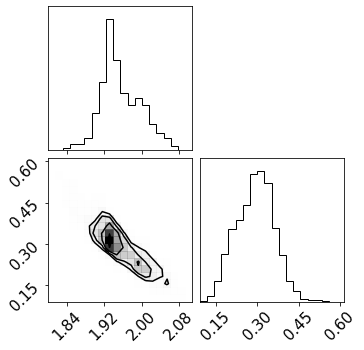

In [11]:
corner.corner(np.genfromtxt('../spin_results/lowspin/APlus_mTOV_2.0_run_120_u_slope_0.2.txt')[:,[2,5]], plot_datapoints=False);

In [276]:
p.m_crit(2, 1)

2.40542

In [ ]:
!python LMG_u.py --detector "APlus" --event_min 30 --event_max 150 --n_events 1 --mtov_true 3 --bh_min 3 --spin_slope 0

In [217]:
real = np.genfromtxt('../spin_results/LMG_convergence/Design_mTOV_2.0_bhmin_2.0_20_u.txt')
likes = np.genfromtxt('../spin_results/LMG_convergence/Design_mTOV_2.0_bhmin_2.0_20_u_likes.txt')

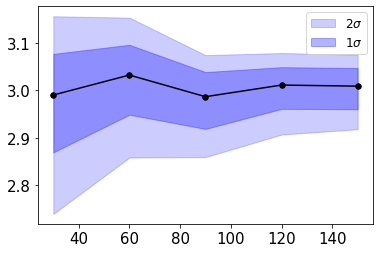

In [206]:
constraints = get_constraints_lmg_2c(np.linspace(30,150,5,dtype='int16'), 2.0, 5.0)
plot_constraints(-1*constraints,np.linspace(30,150,5,dtype='int16'),)

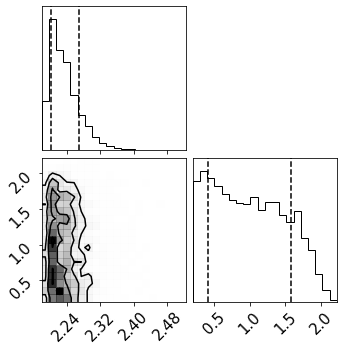

In [226]:
corner.corner(np.genfromtxt('../spin_results/LMG_convergence/Design_mTOV_2.2_bhmin_2.2_20_u.txt')[:,[2,3]], quantiles=[0.16, 0.84], plot_datapoints=False);

In [22]:
test = p.Population([0.63, 1.35, 0.07, 1.85, 0.35, 2, 1, 3, 3, 2, 0.5], 'nsbh', vary_slope=False, selection=True, m1_nospin = True, spinning=True, spin_params=[1.0, 0.0], ignore_spin=False, verbose=False)

In [23]:
pop = test.get_population(10, False, N_samples = 500)

In [24]:
p.set_detector('O3')

In [25]:
test.set_injection_spins(p.injection_set)

In [26]:
%load_ext autoreload
%autoreload 2

(array([ 567.,  725.,  942., 1145., 1111., 1120., 1145., 1071., 1100.,
        1074.]),
 array([1.00080504, 1.30070526, 1.60060547, 1.90050568, 2.2004059 ,
        2.50030611, 2.80020632, 3.10010654, 3.40000675, 3.69990696,
        3.99980718]),
 <BarContainer object of 10 artists>)

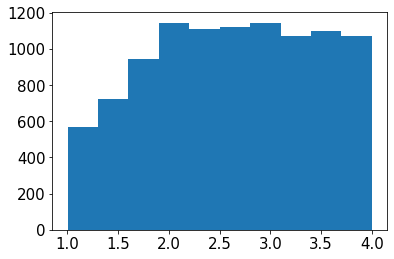

In [262]:
plt.hist(test.new_set[:,1])

In [265]:
test.selection_norm([0.63, 1.35, 0.07, 1.85, 0.35, 2, 5, 2, 1, 0])

0.8619311872251773

/mnt/c/users/christine/gwcosmology/spin!!/populations.py:1231: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(p_m1*p_m2*p_q*spin_likes/(mu)))


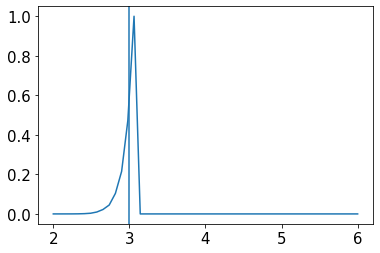

In [27]:
test.samples = False
result = np.zeros(50)
slopes = np.linspace(2.0, 6.0)
for i in range(50):
    result[i] = test.pop_like(pop, [0.63, 1.35, 0.07, 1.85, 0.35, 2, slopes[i], 2, 1, 0])
plt.plot(slopes, np.exp(result-np.max(result)))
plt.axvline(3.0)

In [69]:
def get_constraints_lmg_2c(counts, mTOV, bhmin, hist=False, detector="APlus", folder = 'LMG_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_bhmin_{}_{}.txt'.format(detector, mTOV,bhmin,  counts[i])
        sigma_1 = get_quantiles(run_name, 2, [0.159, 0.841],hist=hist, folder=folder, columns=[6,5])
        sigma_2 = get_quantiles(run_name, 2, [0.025, 0.975], folder=folder, columns=[6,5])
        sigma_3 = get_quantiles(run_name, 2, [0.0015, 0.997], folder=folder, columns=[6,5])
        med = get_quantiles(run_name, 2, [0.5], columns=[6,5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
        if i == 4:
            print(run_name)
    np.savetxt('../spin_results/outputs/{}/{}_2c_{}_{}.txt'.format(folder, detector, mTOV, bhmin), constraints)
    return constraints

def get_constraints_lmg_u(counts, mTOV, bhmin, hist=False, detector="APlus", folder = 'LMG_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_bhmin_{}_{}_u.txt'.format(detector, mTOV,bhmin,  counts[i])
        sigma_1 = get_quantiles(run_name, 2, [0.159, 0.841],hist=hist, folder=folder, columns=[3,2])
        sigma_2 = get_quantiles(run_name, 2, [0.025, 0.975], folder=folder, columns=[3,2])
        sigma_3 = get_quantiles(run_name, 2, [0.0015, 0.997], folder=folder, columns=[3,2])
        med = get_quantiles(run_name, 2, [0.5], columns=[3,2], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
        if i == 4:
            print(run_name)
    np.savetxt('../spin_results/outputs/{}/{}_u_{}_{}.txt'.format(folder, detector, mTOV, bhmin), constraints)
    return constraints

In [73]:
import os
plt.ioff()
base = 'LMG_convergence_medspin'
folder = '../spin_results/{}/'.format(base)
combinations = [] #['2.0', '2.0']
for i in os.listdir(folder):
    # print(i)
    if 'likes' not in i and os.path.isfile(os.path.join(folder,i)) and "Design" in i:
        root = i.split('.txt')[0]
        
        mTOV = root.split('_')[2]
        bhmin = root.split('_')[4]
        if [mTOV, bhmin] not in combinations:
            print(root)
            combinations.append([mTOV, bhmin])
            
            if 'u' in root:
                constraints = get_constraints_lmg_u(np.linspace(10,50,5, dtype='int16'), mTOV, bhmin, detector='Design', folder=base)

            else:
                constraints = get_constraints_lmg_2c(np.linspace(10,50,5, dtype='int16'), mTOV, bhmin, detector='Design', folder=base)
        
            fig = plt.figure()
            plot_constraints(constraints, counts=np.linspace(10,50,5))
            plt.savefig('../spin_results/outputs/{}/{}.png'.format(base, root))
            plt.close(fig)

Design_mTOV_2.0_bhmin_2.0_10
/Design_mTOV_2.0_bhmin_2.0_50.txt
Design_mTOV_2.0_bhmin_2.41_10
/Design_mTOV_2.0_bhmin_2.41_50.txt
Design_mTOV_2.0_bhmin_5.0_10
/Design_mTOV_2.0_bhmin_5.0_50.txt
Design_mTOV_2.2_bhmin_2.2_10
/Design_mTOV_2.2_bhmin_2.2_50.txt
Design_mTOV_2.2_bhmin_2.65_10
/Design_mTOV_2.2_bhmin_2.65_50.txt
Design_mTOV_2.2_bhmin_5.0_10
/Design_mTOV_2.2_bhmin_5.0_50.txt


In [123]:
from scipy.stats import truncnorm

In [137]:
base='real_data'
folder = '../spin_results/{}/'.format(base)
for i in os.listdir(folder):
    if 'likes' not in i and os.path.isfile(os.path.join(folder, i))  and 'slope' not in i:
        root = i.split('.txt')[0]
        print(root)
        real = np.genfromtxt(folder + '{}.txt'.format(root))
        likes = np.genfromtxt(folder + '{}_likes.txt'.format(root))
        indices = np.arange(real.shape[0])
        
        if '2c' in root:
            # don't do anything
            print(i)
                
            #constraints = get_constraints(real[:,5], '99pc/{}.txt'.format(root), folder='medspin')
            #print(constraints)
        elif '1c' in root:
            cutoff = np.zeros(200)
            for j in range(200):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                cutoff[j] = truncnorm.ppf(0.99, loc=point[0], scale=point[1], a=(1-point[0])/point[1], b=(point[2]-point[0])/point[1])
            constraints = get_constraints(cutoff, '99pc/{}.txt'.format(root), folder=base)
            print(constraints)
        elif 'u' in root:
            cutoff = np.zeros(200)
            for j in range(200):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                cutoff[j] = (point[2]-1)*0.99 + 1
            constraints = get_constraints(cutoff, '99pc/{}.txt'.format(root), folder=base)
            print(constraints)

1c_default_chieff_nogw190814_nogw190426_
[1.5350697967497178, 1.6422953229389996, 1.8917698991111975, 2.089874941943441, 2.4353690227732754, 2.84550913709675, 3.0962396129176897]
1c_default_chieff_nogw190814_nogw190426_0q
[1.6641627127653038, 1.80790972807239, 1.9780929068205204, 2.2979957659423853, 2.7451816897715577, 3.1128025567874205, 3.3407487412713257]
1c_default_chieff_nogw190814_withgw190426_
[1.5055274726432257, 1.6333121583473955, 1.8612325774376548, 2.0092985836571957, 2.2413769514158797, 2.511690200347015, 2.930411324404771]
1c_default_chieff_nogw190814_withgw190426_0q
[1.5738837859585928, 1.7759819606487093, 1.9195057311233066, 2.193057353847731, 2.62566199295982, 3.153603763644123, 3.281890748150358]
1c_default_chieff_withgw190814_nogw190426_
[2.089445142023127, 2.199222243211046, 2.4413265738701737, 2.639523503997101, 2.9195949457872468, 3.1531133117484784, 3.216839106256431]
1c_default_chieff_withgw190814_nogw190426_0q
[2.2560173719659025, 2.3285317459424495, 2.52225419

[1.5296134527750598, 1.5647855733887792, 1.7207768146523028, 1.9146753942444756, 2.0919412520958987, 2.2796166972820346, 2.592617653985709]
u_default_direct_nogw190814_withgw190426_0q
[1.5410392607091707, 1.6561607122081696, 1.8260607653665484, 2.0435954924783637, 2.426067932419536, 2.8845386493634697, 3.4358774460288157]
u_default_direct_withgw190814_nogw190426_
[2.0778770667760846, 2.1878922153808658, 2.315052997380784, 2.500204265766136, 2.711268424924641, 3.1980721349143812, 3.416633038965588]
u_default_direct_withgw190814_nogw190426_0q
[2.105219884896988, 2.195976555366678, 2.357410502063698, 2.6474679285792213, 3.032146126083517, 3.372407723336372, 3.4322616457452355]
u_default_direct_withgw190814_withgw190426_
[2.117053160217337, 2.1386115113216504, 2.2638700942925754, 2.416542981648659, 2.6069914110122308, 2.876093224376822, 3.199204318456564]
u_default_direct_withgw190814_withgw190426_0q
[2.1886201500228335, 2.221291030212438, 2.3519676874170896, 2.6154069298929667, 2.88447118

In [66]:
folder = '../spin_results/lowspin/'
for i in os.listdir(folder):
    if 'likes' not in i and os.path.isfile(os.path.join(folder, i))  and 'slope' not in i:
        root = i.split('.txt')[0]
        print(root)
        if '2c' in root:
            real = np.genfromtxt(folder + '{}.txt'.format(root))
            likes = np.genfromtxt(folder + '{}_likes.txt'.format(root))
            constraints = get_constraints(real[:,5], 'mTOV/{}.txt'.format(root), folder='lowspin')
            print(constraints)
        else:
            real = np.genfromtxt(folder + '{}.txt'.format(root))
            likes = np.genfromtxt(folder + '{}_likes.txt'.format(root))
            constraints = get_constraints(real[:,2], 'mTOV/{}.txt'.format(root), folder='lowspin')
            print(constraints)

APlus_mTOV_2.0_run_120
[1.942850194000013, 1.956393121487735, 1.9731852873736766, 1.9976264247547393, 2.017543958265842, 2.0332242408572943, 2.0476318276569274]
APlus_mTOV_2.0_run_120_2component
[1.9362149171561833, 1.9494499407664856, 1.9675307967264255, 1.9959286737682875, 2.0116612077419065, 2.024308327059797, 2.0426423908649576]
APlus_mTOV_2.0_run_120_2c_bias
[2.7037409509015355, 2.7376940949005437, 2.803394207840699, 2.969854934588957, 3.271608395809241, 3.4355747906447687, 3.48411965225984]
APlus_mTOV_2.0_run_120_uniform
[1.9409389692595962, 1.9537924233980835, 1.9646699499970275, 1.981164940226744, 2.0101857491830484, 2.0341431149942957, 2.0579160734976703]
APlus_mTOV_2.0_run_120_u_bias
[2.722694785104431, 2.735001574383537, 2.7422667773855713, 2.763558903277466, 2.795325332769496, 2.8103424325132034, 2.829275859061126]
APlus_mTOV_2.0_run_150
[1.9421456222904607, 1.954891181046148, 1.9679341077971395, 1.9822898097381958, 2.007999078609218, 2.0250000799506154, 2.0405020090448662]

[2.7203590530122224, 2.7265359159609637, 2.7409969230821285, 2.778855975950301, 2.8013559127934515, 2.8216760982791964, 2.8455895483586637]
Design_mTOV_2.0_run_10
[1.829697131280196, 1.889030184607308, 1.9496476917885752, 2.019935745618477, 2.1021283874349415, 2.2976055223604464, 2.4686081964098796]
Design_mTOV_2.0_run_10_2component
[1.879733391812156, 1.9164063205229342, 1.951098768003578, 2.000147450023729, 2.091280499033238, 2.2775728289623776, 2.4792543625383106]
Design_mTOV_2.0_run_10_2c_bias
[1.89105983862108, 1.9349298517149, 1.9857400407244183, 2.051115853707296, 2.169402622861221, 3.253099210398078, 3.46140902028895]
Design_mTOV_2.0_run_10_uniform
[1.7278825971793912, 1.7744143547217073, 1.8512724535256155, 1.9422625047755138, 2.038233555384811, 2.127099219732612, 2.2000304065576075]
Design_mTOV_2.0_run_10_u_bias
[1.8853383095123923, 1.903420955022026, 1.930564559129719, 1.976198722387816, 2.0215736227307386, 2.084503497986099, 2.143217951860634]
Design_mTOV_2.0_run_20
[1.8537

[2.1216463020452476, 2.1426805844111745, 2.168677885620046, 2.191822174838321, 2.221529180819104, 2.2623741876109573, 2.298234818265854]
Design_mTOV_2.2_run_50_u_bias
[3.186251257782739, 3.2014480727097085, 3.2246860448977817, 3.2532273178035096, 3.290873460050065, 3.32273918145062, 3.3587968094930787]


In [60]:
import os
for i in os.listdir('../spin_results/mTOV_convergence/'):
    if 'likes' not in i and os.path.isfile(os.path.join('../spin_results/mTOV_convergence/',i)) and 'slope' not in i:
        root = i.split('.txt')[0]
        print(root)
        if '2c' in root:
            real = np.genfromtxt('../spin_results/mTOV_convergence/{}.txt'.format(root))
            likes = np.genfromtxt('../spin_results/mTOV_convergence/{}_likes.txt'.format(root))
            constraints = get_constraints(real[:,5], 'mTOV/{}.txt'.format(root), folder='mTOV_convergence')
            print(constraints)
        else:
            real = np.genfromtxt('../spin_results/mTOV_convergence/{}.txt'.format(root))
            likes = np.genfromtxt('../spin_results/mTOV_convergence/{}_likes.txt'.format(root))
            constraints = get_constraints(real[:,2], 'mTOV/{}.txt'.format(root), folder='mTOV_convergence')
            print(constraints)

APlus_mTOV_2.0_run_120
[1.9532811842390374, 1.9601165990016975, 1.9743307053020267, 1.9982876277298234, 2.028869212914245, 2.0607377705533825, 2.0852214714505957]
APlus_mTOV_2.0_run_120_2component
[1.8950155480618727, 1.9121533883558592, 1.927841377405372, 1.9556899009475022, 1.9852754327737863, 2.0127883589581974, 2.0380353504025166]
APlus_mTOV_2.0_run_120_2c_bias
[2.734558997137636, 2.772456731529322, 2.8306883901905935, 3.026249899024414, 3.3828418719519675, 3.4861033733824276, 3.498033138813864]
APlus_mTOV_2.0_run_120_uniform
[1.974822532314874, 1.9803873921712396, 1.9897867032524135, 2.0015249905051578, 2.0148187705696494, 2.0237962291762175, 2.0316278676094846]
APlus_mTOV_2.0_run_120_u_bias
[2.897855507283264, 2.897855507283264, 2.89924678729131, 2.901167178781634, 2.904211975871724, 2.9065082212133673, 2.9065082212133673]
APlus_mTOV_2.0_run_150
[1.9590705699166395, 1.9699235234402337, 1.9854972397915676, 2.014498850092767, 2.0355669727201664, 2.069298856873518, 2.092025961934586

[2.789552663942419, 2.789552663942419, 2.7947159156180086, 2.7983075992801334, 2.802913130136858, 2.804743193527719, 2.8047431935277194]
Design_mTOV_2.0_run_10
[1.8258542713856831, 1.8662017094082406, 1.9163956666939412, 1.9920197065579626, 2.121975268918593, 2.3819438123937187, 3.0381875439159436]
Design_mTOV_2.0_run_10_2component
[1.8019877539341895, 1.8328571678023182, 1.8717973157982002, 1.9506710912661733, 2.0716528567661654, 2.2735332313211005, 2.787758045425996]
Design_mTOV_2.0_run_10_2c_bias
[1.9584526118395646, 1.9584526118395646, 1.9881125269022544, 2.0035595416075416, 2.015931550272623, 2.0281537877722866, 2.0281537877722866]
Design_mTOV_2.0_run_10_uniform
[1.823461131550817, 1.859053580219355, 1.9002047469346448, 1.952598162357743, 2.0136786790336556, 2.0926219815647875, 2.1739955635496346]
Design_mTOV_2.0_run_10_u_bias
[2.053031808495679, 2.0783715206461952, 2.108398031725137, 2.15232468528101, 2.217604232720575, 2.3232185771293925, 2.4336083414174072]
Design_mTOV_2.0_run_

[2.116029522334046, 2.1335345618134043, 2.159680186081446, 2.2025559341295486, 2.2360870372645927, 2.2852533827107933, 2.314929099131998]
Design_mTOV_2.2_run_50_u_bias
[3.3877781347366267, 3.3877781347366267, 3.3930551034095733, 3.4024584509975706, 3.4105166490782026, 3.4204280798736706, 3.4204280798736706]


In [134]:
root='1c_default_chieff_nogw190814_nogw190426_'
real = np.genfromtxt('../spin_results/real_data/{}.txt'.format(root))
likes = np.genfromtxt('../spin_results/real_data/{}_likes.txt'.format(root))

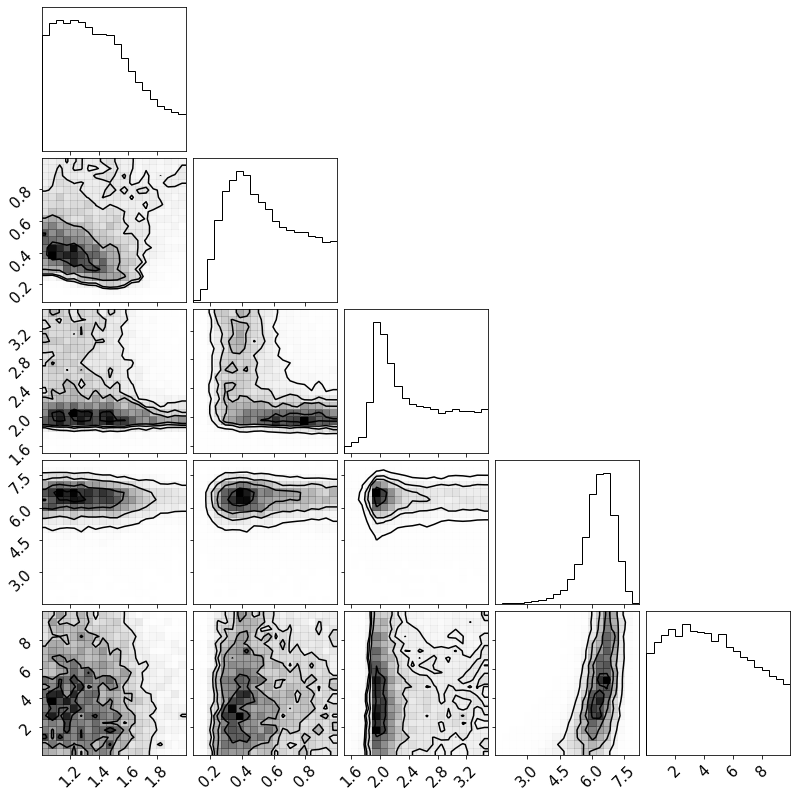

In [135]:
corner.corner(real[real[:,5]<=1][:, :5], plot_datapoints=False); #[real[:,5]<=1][real[:,5]>0.985]
#get_constraints(real[real[:,5]<=1][:,2], 'mTOV/{}.txt'.format(root))
#get_constraints(real[real[:,5]<=1][:,3], 'bhmin/{}.txt'.format(root))
#get_constraints(real[real[:,5]<=1][:,4], 'bhslope/{}.txt'.format(root))


In [146]:
# index = 0
rows_list = []
for i in os.listdir('../spin_results/outputs/real_data/bhmin'):
    test = []
    #test.append(index)
    test.append(i.split('_')[2]) #type
    
    if 'withgw190814' in i:
        test.append(True)
    else:
        test.append(False)
    if 'withgw190426' in i:
        test.append(True)
    else:
        test.append(False)
    
    test.append(i.split('_')[0]) # mass model
    
    if '0q' in i:
        test.append(0)
    else:
        test.append(3)
    
    mtov_path = '../spin_results/outputs/real_data/mTOV/' + i
    mtov_dat = np.genfromtxt(mtov_path)
    mtov_str = '${0:.1f}^{{+{1:.1f}}}_{{-{2:.1f}}}$'.format(mtov_dat[3], mtov_dat[4]-mtov_dat[3], mtov_dat[3]-mtov_dat[2])
    test.append(mtov_str)
    min_str = mtov_dat[1]
    test.append('{0:.1f}'.format(min_str))
    
    if '2c' in i:
        test.append(' ')
    else:
        pc_path = '../spin_results/outputs/real_data/99pc/' + i
        pc_dat = np.genfromtxt(pc_path)
        pc_str = '${0:.1f}^{{+{1:.1f}}}_{{-{2:.1f}}}$'.format(pc_dat[3], pc_dat[4]-pc_dat[3], pc_dat[3]-pc_dat[2])
        test.append(pc_str)
    
    bhmin_path = '../spin_results/outputs/real_data/bhmin/' + i
    bhmin_dat = np.genfromtxt(bhmin_path)
    bhmin_str = '${0:.1f}^{{+{1:.1f}}}_{{-{2:.1f}}}$'.format(bhmin_dat[3], bhmin_dat[4]-bhmin_dat[3], bhmin_dat[3]-bhmin_dat[2])
    test.append(bhmin_str)
    
    abh_path = '../spin_results/outputs/real_data/bhslope/' + i
    abh_dat = np.genfromtxt(abh_path)
    abh_str = '${0:.1f}^{{+{1:.1f}}}_{{-{2:.1f}}}$'.format(abh_dat[3], abh_dat[4]-abh_dat[3], abh_dat[3]-abh_dat[2])
    test.append(abh_str)
    
    lmg_path = '../spin_results/outputs/real_data/massgap/' + i
    lmg_dat = np.genfromtxt(lmg_path)
    lmg_str = '${0:.1f}^{{+{1:.1f}}}_{{-{2:.1f}}}$'.format(lmg_dat[3], lmg_dat[4]-lmg_dat[3], lmg_dat[3]-lmg_dat[2])
    test.append(lmg_str)
    
    if '2c' in i:
        test.append(' ')
    else:
        lmg_path = '../spin_results/outputs/real_data/99pc_massgap/' + i
        lmg_dat = np.genfromtxt(lmg_path)
        lmg_str = '${0:.1f}^{{+{1:.1f}}}_{{-{2:.1f}}}$'.format(lmg_dat[3], lmg_dat[4]-lmg_dat[3], lmg_dat[3]-lmg_dat[2])
        test.append(lmg_str)
    
    #print(test)
    rows_list.append(test)

In [147]:
result = pd.DataFrame(rows_list)
result

0      1      2   3  4                    5    6  \
0   chieff  False  False  1c  3  $2.3^{+0.8}_{-0.4}$  1.8   
1   chieff  False  False  1c  0  $2.5^{+0.7}_{-0.5}$  1.8   
2   chieff  False   True  1c  3  $2.3^{+0.8}_{-0.4}$  1.6   
3   chieff  False   True  1c  0  $2.4^{+0.7}_{-0.4}$  1.7   
4   chieff   True  False  1c  3  $2.9^{+0.4}_{-0.3}$  2.3   
..     ...    ...    ...  .. ..                  ...  ...   
64     pos  False   True   u  0  $2.0^{+0.4}_{-0.2}$  1.6   
65     pos   True  False   u  3  $2.6^{+0.2}_{-0.3}$  2.1   
66     pos   True  False   u  0  $2.7^{+0.4}_{-0.2}$  2.2   
67     pos   True   True   u  3  $2.5^{+0.2}_{-0.2}$  2.1   
68     pos   True   True   u  0  $2.6^{+0.3}_{-0.2}$  2.2   

                      7                    8                    9  \
0   $2.1^{+0.4}_{-0.2}$  $6.4^{+0.6}_{-0.8}$  $4.4^{+3.4}_{-2.9}$   
1   $2.2^{+0.5}_{-0.3}$  $6.2^{+0.7}_{-1.0}$  $5.9^{+2.7}_{-2.5}$   
2   $2.0^{+0.2}_{-0.2}$  $5.7^{+0.7}_{-0.7}$  $4.1^{+3.3}_{-2.5}$   
3   $2.2^{+0.4}_{-0.3}$  $5.7^{+0.7}_{-0.7}$  $6.2^{+2.3}_{-2.3}$   
4   $2.6^{+0.2}_{-0.2}$  $6.2^{+0.6}_{-0.9}$  $1.0^{+1.2}_{-0.7}$   
..                  ...                  ...                  ...   
64  $2.0^{+0.3}_{-0.2}$  $6.3^{+0.5}_{-0.8}$  $6.6^{+2.3}_{-2.4}$   
65  $2.6^{+0.2}_{-0.3}$  $6.7^{+0.5}_{-1.0}$  $1.0^{+1.2}_{-0.7}$   
66  $2.7^{+0.3}_{-0.2}$  $6.4^{+0.7}_{-1.5}$  $3.1^{+1.4}_{-0.9}$   
67  $2.5^{+0.2}_{-0.2}$  $6.0^{+0.7}_{-0.7}$  $1.0^{+1.2}_{-0.7}$   
68  $2.6^{+0.3}_{-0.2}$  $5.9^{+0.7}_{-1.0}$  $3.5^{+1.4}_{-1.0}$   

                     10                   11  
0   $3.9^{+0.8}_{-1.0}$  $4.2^{+0.8}_{-0.9}$  
1   $3.7^{+0.9}_{-1.2}$  $3.9^{+0.9}_{-1.1}$  
2   $3.3^{+0.8}_{-1.0}$  $3.6^{+0.7}_{-0.7}$  
3   $3.2^{+0.8}_{-1.0}$  $3.5^{+0.7}_{-0.9}$  
4   $3.3^{+0.7}_{-0.9}$  $3.6^{+0.7}_{-0.9}$  
..                  ...                  ...  
64  $4.2^{+0.6}_{-0.8}$  $4.2^{+0.7}_{-0.9}$  
65  $4.1^{+0.6}_{-1.0}$  $4.1^{+0.6}_{-1.0}$  
66  $3.6^{+0.8}_{-1.5}$  $3.7^{+0.8}_{-1.4}$  
67  $3.5^{+0.7}_{-0.8}$  $3.5^{+0.7}_{-0.8}$  
68  $3.2^{+0.8}_{-1.0}$  $3.2^{+0.8}_{-1.0}$  

[69 rows x 12 columns]

In [148]:
result.to_csv('../spin_results/spin_results.csv')

[-1.5346665384657117,
 -0.3246879278892532,
 1.6343762733212452,
 3.0252781390954104,
 3.918333189124443,
 4.616020020894091,
 5.09260377572132]

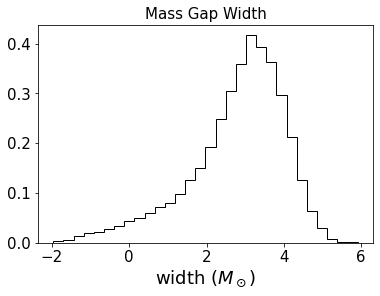

In [44]:
massgap = real[real[:,5]<=1][:,3]-real[real[:,5]<=1][:,2]
hist = plt.hist(massgap, histtype='step', color='k', density=True, bins=30)
plt.title('Mass Gap Width')
plt.xlabel('width ($M_\odot$)')
get_constraints(massgap, 'massgap/{}.txt'.format(root))

In [231]:
real = real[:,[5,6]]

In [234]:
likes = likes[np.argsort(real[:,0])]
real = real[np.argsort(real[:,0])]

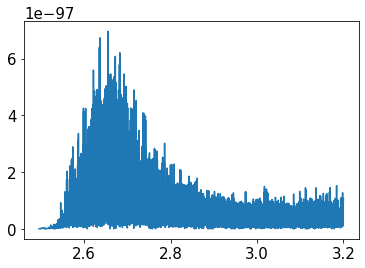

In [235]:
plt.plot(real[:,0], np.exp(likes))

In [107]:
def get_constraints_2c(counts, mTOV, hist=False, detector="APlus", folder = 'mTOV_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_run_{}_2component.txt'.format(detector, mTOV, counts[i])
        sigma_1 = get_quantiles(run_name, 5, [0.159, 0.841],hist=hist, folder=folder)
        sigma_2 = get_quantiles(run_name, 5, [0.025, 0.975], folder=folder)
        sigma_3 = get_quantiles(run_name, 5, [0.0015, 0.997], folder=folder)
        med = get_quantiles(run_name, 5, [0.5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_mTOV_2C_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

In [108]:
def get_constraints_u(counts, mTOV, hist=False, detector="APlus", folder = 'mTOV_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_run_{}_uniform.txt'.format(detector, mTOV, counts[i])
        sigma_1 = get_quantiles(run_name, 2, [0.159, 0.841],hist=hist, folder=folder)
        sigma_2 = get_quantiles(run_name, 2, [0.025, 0.975], folder=folder)
        sigma_3 = get_quantiles(run_name, 2, [0.0015, 0.997], folder=folder)
        med = get_quantiles(run_name, 2, [0.5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_mTOV_u_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

In [46]:
def plot_constraints(constraints, counts, color='b'):
    # plt.fill_between(counts, constraints[:,0], constraints[:,6], color='b', alpha=0.1, label = '$3\sigma$')
    plt.fill_between(counts, constraints[:,1], constraints[:,5], color=color, alpha=0.2, label = '$2\sigma$')
    plt.fill_between(counts, constraints[:,2], constraints[:,4], color=color, alpha=0.3, label = '$1\sigma$')
    plt.plot(counts, constraints[:,3], c='k')
    plt.scatter(counts, constraints[:,3], c='k', s=30)
    plt.legend()

In [10]:
def calc_convergence(file, counts=np.linspace(10,50,5,dtype='int16'), plot=True):
    constraints = np.genfromtxt(file)
    sig3 = constraints[:,-1]-constraints[:,0]
    sig2 = constraints[:,-2]-constraints[:,1]
    sig1 = constraints[:,-3]-constraints[:,2]
    if plot:
        plt.plot(counts, sig3, label='3$\sigma$')
        plt.plot(counts, sig2, label='2$\sigma$')
        plt.plot(counts, sig1, label='1$\sigma$')
        plt.yscale('log')
        plt.xscale('log')
    p = np.polyfit(x=np.log(counts), y=np.log(sig1), deg=1)
    print(p)

In [ ]:
constraints = get_constraints_1c(counts=np.linspace(10,50,5,dtype='int16'), mTOV=2.0, hist=False, detector="Design")

In [ ]:
constraints = np.genfromtxt('/mnt/c/users/christine/gwcosmology/spin_results/outputs/lowspin/APlus_mTOV_1C_2.0.txt')
constraints2 = np.genfromtxt('/mnt/c/users/christine/gwcosmology/spin_results/outputs/highspin/APlus_mTOV_1C_2.0.txt')
plot_constraints(constraints, counts=np.linspace(10,50,5,dtype='int16'))
plot_constraints(constraints2, counts=np.linspace(10,50,5,dtype='int16'), color='r')
plt.ylabel('$M_{TOV}$')
plt.xlabel('Event Count')

In [399]:
f = h5py.File('./results/spinning_test_run.h5', 'r')


In [11]:
!pwd

/mnt/c/users/christine/gwcosmology/spin!!


In [139]:
samples = np.genfromtxt('/mnt/c/users/christine/gwcosmology/spin_results/mTOV_convergence/mTOV_2_run_50_2component.txt')
likes = np.genfromtxt('/mnt/c/users/christine/gwcosmology/spin_results/mTOV_convergence/mTOV_2_run_50_2component_likes.txt')


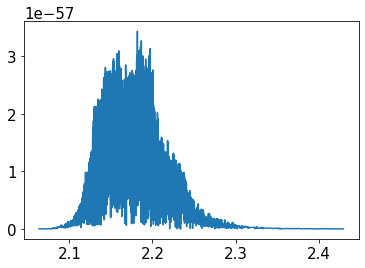

In [140]:
plt.plot(samples[:,5][np.argsort(samples[:,5])], np.exp(likes[np.argsort(samples[:,5])]))

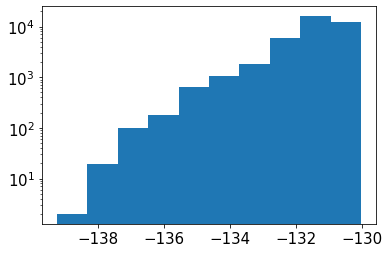

In [138]:
plt.hist(likes)
plt.yscale('log')

In [391]:
f['mcmc']['chain']

<HDF5 dataset "chain": shape (20000, 14, 7), type "<f8">

In [392]:
samples = np.array(f['mcmc']['chain']).reshape((280000,7))

In [441]:
samples.shape

(26600, 7)

In [430]:
test.pop_like(pop, [1.4, 0.5, 2, 5, 4, 1.0, 0])

-79.30117920083256

In [404]:
pop = np.genfromtxt('./results/pop_samples.txt')

In [414]:
test.samples=True

In [406]:
pop = pop.reshape((50, 3000, 4))

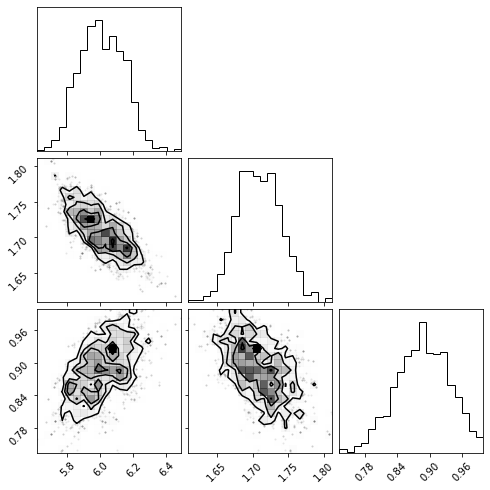

In [411]:
corner.corner(pop[30][:,[0,1,3]]);

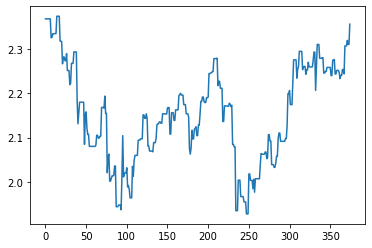

In [111]:
plt.plot(pop[1][::8,1])

In [19]:
test = p.Population([1.4, 0.5, 2, 1, 3, 5, 4], 'nsbh_one', False, selection=True, m1_nospin = True, spinning=False, spin_params=[1, 1])

vary slope: False
selection: True
spinning: False
no m1 spin: True


In [22]:
pop = test.get_population(20, False)

0.046620046620046623


In [29]:
pop = test.get_population(2, True)

[0.07833974 0.07833974 0.         0.03916987] [[5.63400248 1.9079921  0.         0.65292981]
 [5.51716354 2.01933212 0.         0.59938448]
 [5.48385806 1.95779149 0.         0.72887748]
 [5.50410028 2.13916245 0.         0.69504755]
 [5.63376871 2.14060657 0.         0.65394565]
 [5.39774097 2.02651705 0.         0.64851758]
 [5.62380392 2.09724237 0.         0.61743413]
 [5.56812976 2.13498219 0.         0.75216509]]
[0.0820522 0.0820522 0.        0.0410261] [[5.22343734 1.51057667 0.         0.2484339 ]
 [5.20038618 1.44107147 0.         0.19008616]
 [5.07586448 1.38133325 0.         0.23647295]
 [5.10985702 1.33809201 0.         0.280207  ]
 [5.1964528  1.37867288 0.         0.18934632]
 [5.25880416 1.43469351 0.         0.23712608]
 [5.17858939 1.38491933 0.         0.23171454]
 [5.10770779 1.47073542 0.         0.26577801]]


In [30]:
pop2 = test.get_population(2, True)

[0.09640242 0.09640242 0.         0.04820121] [[6.07511151 1.97636557 0.         0.94532955]
 [6.1053472  2.0362457  0.         0.9828523 ]
 [5.92715817 1.90564899 0.         0.92979429]
 [6.07141914 2.05638096 0.         0.95928703]
 [6.12357206 1.91457921 0.         0.89067565]
 [6.05441398 2.08003767 0.         1.00400275]
 [5.98903349 1.9746981  0.         0.99078162]
 [6.176506   2.06598959 0.         0.91620329]]
[0.08444752 0.08444752 0.         0.04222376] [[5.74971835 1.64266024 0.         0.66499053]
 [5.73777617 1.5503593  0.         0.66589567]
 [5.6986758  1.57905648 0.         0.67530441]
 [5.78679222 1.56597999 0.         0.67732719]
 [5.80330915 1.54708301 0.         0.61949035]
 [5.50958609 1.48421381 0.         0.66882089]
 [5.69466828 1.54922795 0.         0.65688078]
 [5.90320088 1.67935942 0.         0.59923855]]


In [32]:
np.vstack([pop, pop2]).shape

(4, 3000, 4)

In [13]:
test.samples = True
test.pop_like(pop, [1.4, 0.5, 2, 5, 4])

-76.63955081476718

In [3]:
pop = np.genfromtxt('./results/full_pop_samples.txt')

In [4]:
pop = pop.reshape((50,3000,4))

In [464]:
test.samples = True

In [25]:
pop = pop[0]

/mnt/c/users/christine/gwcosmology/spin!!/populations.py:1131: RuntimeWarning: divide by zero encountered in log
  


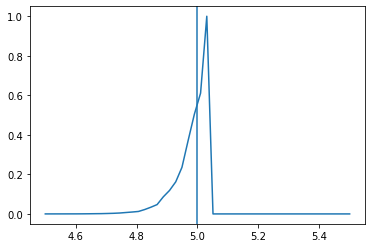

In [28]:
test.set_injection_spins(p.injection_set)
result = np.zeros(50)
slopes = np.linspace(4.5, 5.5)
#slopes = np.linspace(0.1, 1)
for i in range(50):
    result[i] = test.pop_like(pop, [1.4,  0.5,  2,slopes[i], 4])
plt.plot(slopes, np.exp(result-np.max(result)))
plt.axvline(5)

In [125]:
test.pop_like(pop, [1.4, 0.5, 2, 1, 3, 5, 4])

-220.07700457719875

In [413]:
test = p.Population([1.4, 0.5, 2, 1, 3, 5, 4], 'nsbh_one', False, selection=True, m1_nospin = True, spinning=True, spin_params=[1, 0])

vary slope: False
selection: True
spinning: True
no m1 spin: True


In [321]:
test = p.Population([1.4, 0.5, 2, 0, 3], 'one', False, selection=False, m1_nospin = True, spinning=False)

vary slope: False
selection: False
spinning: False
no m1 spin: True


In [310]:
pop = test.get_population(10000, False)

1.0


In [369]:
data = p.generate_truncnormal(10000,1.4, 0.5, 1, 2)

In [311]:
data = pop[:,:,0].squeeze()

In [380]:
pop = test.get_population(1000, False)
data = pop[:,:,0].squeeze()
data2 = pop[:,:,1].squeeze()
mus = np.linspace(1.2, 1.6)
sigmas = np.linspace(0.2, 0.7)
results = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        results[i,j]=np.sum(np.log(p.truncnormal_like(data, mus[i], sigmas[j], 1, 2) * p.like_m2(data2, data, 1, 3))) #pop[:,:,0].squeeze()

1.0


[  1.           1.99784023   2.98903023 ... 135.1032793  135.1032793
 135.1032793 ]
[0.68 0.95]


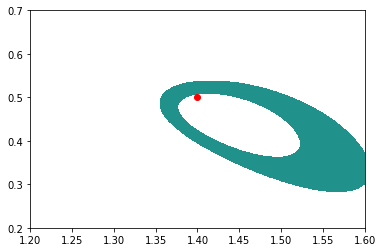

In [381]:
plt.contourf(np.exp(results-np.max(results)), extent=[np.min(mus), np.max(mus), np.min(sigmas), np.max(sigmas)], levels=credible_levels(np.exp(results-np.max(results)).flatten(), np.array([0.68, 0.95])))
plt.scatter(1.4, 0.5, c='r')

In [ ]:
pop = test.get_population(1000, False)
data = pop[:,:,0].squeeze()
data2 = pop[:,:,1].squeeze()
mus = np.linspace(1.2, 1.6)
sigmas = np.linspace(0.2, 0.7)
results = np.zeros((50,50))
for i in range(50):
    print(i)
    for j in range(50):
        results[i,j]=test.pop_like(pop, params=[mus[i], sigmas[j], 2]) #pop[:,:,0].squeeze()

[  1.           1.98104363   2.95841679 ... 145.38011032 145.38011032
 145.38011032]
[0.68 0.95]


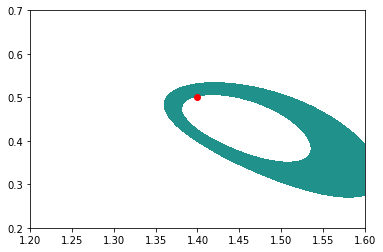

In [368]:
plt.contourf(np.exp(results-np.max(results)), extent=[np.min(mus), np.max(mus), np.min(sigmas), np.max(sigmas)], levels=credible_levels(np.exp(results-np.max(results)).flatten(), np.array([0.68, 0.95])))
plt.scatter(1.4, 0.5, c='r')

In [241]:
def credible_levels(ps, fs):
    """Find the probability levels that correspond to a given array of credible levels, e.g. to then pass into the levels argument of a contour plot
    Parameters:
       ps (1-d numpy array):
          the PDF values, a flattened array
       fs (1-d numpy array):
          the desired credible levels in ascending order, e.g. array([0.5,0.9]) for 50% and 90% credible levels
    """
    sorter = np.argsort(ps)
    ps_sorted = ps[sorter]
    ps_sorted = ps_sorted[::-1] #largest to smallest
    csum = np.cumsum(ps_sorted)
    print(csum)
    print(fs) 
    idxs = np.searchsorted(csum,fs*csum[-1])
    levels = ps_sorted[idxs]
    levels = levels[::-1]
    return levels

In [73]:
a, b = test.infer(pop, fixed={"m_TOV":2, "bh_min": 5, "bh_slope": 4, "max_jjkep": 1, "spin_slope": 1}, steps=1000)

 40%|████      | 401/1000 [00:44<01:12,  8.27it/s]/mnt/c/users/christine/gwcosmology/spin!!/populations.py:1020: RuntimeWarning: divide by zero encountered in log
  result = np.sum([np.log(self.event_likelihood_one_single(i, params)/mu) for i in samples])
100%|██████████| 1000/1000 [01:56<00:00,  8.57it/s]


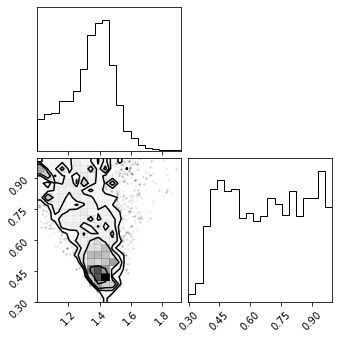

In [74]:
corner.corner(a[:,[0,1]]);

In [64]:
mus = np.linspace(1, 2)
sigmas = np.linspace(0.1, 1.0)
results = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        results[i,j]=test.pop_like(pop, [mus[i], sigmas[j], 2, 5, 4, 1, 1])

In [75]:
mus = np.linspace(1, 2)
sigmas = np.linspace(0.1, 1.0)
results = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        results[i,j]=test.pop_like(pop, [mus[i], sigmas[j], 2, 5, 4, 1, 1])